Observations:
    
    Negative to zero values in latitudes showed higher max temperatures.
    
    Couldn't tell a relationship between humidity and latitude but did notice the obvious outlier with around 300% humidity.
    
    In wind speed versus latitude chart, I couldn't find a clear relationship, but seems the fastest speeds happened the 
    farther the city was from 0 latitude in either direction, fastest ones between latitude 50 and 70.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import requests
import json
import datetime
from citipy import citipy
from config import api_key
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [17]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
temperatures ,humidities, cloudiness, windSpeed, latitudes, finalCities, countries, lngs, dates = [], [], [], [], [], [], [],[],[]
row_count = 1
e_count = 1
#create query url
for city in cities:
    #data = requests.get(url).json()
    query = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city
    response = requests.get(query).json()
    
    try:
        temperature = response['main']['temp_max']
        temperatures.append(temperature)
        humidity = response['main']['humidity']
        humidities.append(humidity)
        cloud = response['clouds']['all']
        cloudiness.append(cloud)
        speed = response['wind']['speed']
        windSpeed.append(speed)
        latitude = response['coord']['lat']
        latitudes.append(latitude)
        longtitude = response['coord']['lon']
        lngs.append(longtitude)
        finalCities.append(city)
        country = response['sys']['country']
        countries.append(country)
        date = response['dt']
        dates.append(date)
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , response["name"], response["sys"]["country"])
        print(query)
        row_count += 1
        
    except KeyError:
        e_count += 1

print(len(temperatures))
print(e_count)

------------------------
Proceesing: City #  1  |  Victoria BN
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=victoria
------------------------
Proceesing: City #  2  |  La Palma CO
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=la palma
------------------------
Proceesing: City #  3  |  Thinadhoo MV
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=thinadhoo
------------------------
Proceesing: City #  4  |  Atuona PF
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=atuona
------------------------
Proceesing: City #  5  |  Rikitea PF
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=rikitea
------------------------
Proceesing: City #  6  |  Albany US
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

------------------------
Proceesing: City #  48  |  Hithadhoo MV
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=hithadhoo
------------------------
Proceesing: City #  49  |  Cape Town ZA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=cape town
------------------------
Proceesing: City #  50  |  Hasaki JP
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=hasaki
------------------------
Proceesing: City #  51  |  Lufilufi WS
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=lufilufi
------------------------
Proceesing: City #  52  |  Kruisfontein ZA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=kruisfontein
------------------------
Proceesing: City #  53  |  Clyde River CA
http://api.openweathermap.org/data/2.5/weathe

------------------------
Proceesing: City #  95  |  Rawson AR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=rawson
------------------------
Proceesing: City #  96  |  Hilo US
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=hilo
------------------------
Proceesing: City #  97  |  Alpena US
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=alpena
------------------------
Proceesing: City #  98  |  Ahipara NZ
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=ahipara
------------------------
Proceesing: City #  99  |  Jamestown AU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=jamestown
------------------------
Proceesing: City #  100  |  Vostok RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5653

------------------------
Proceesing: City #  142  |  Achim DE
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=achim
------------------------
Proceesing: City #  143  |  Iranshahr IR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=iranshahr
------------------------
Proceesing: City #  144  |  Saint-Andre-les-Vergers FR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=saint-andre-les-vergers
------------------------
Proceesing: City #  145  |  Nikolskoye RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=nikolskoye
------------------------
Proceesing: City #  146  |  Sorong ID
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=sorong
------------------------
Proceesing: City #  147  |  Tutoia BR
http://api.openweathermap.

------------------------
Proceesing: City #  189  |  Ous RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=ous
------------------------
Proceesing: City #  190  |  Spring Valley US
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=spring valley
------------------------
Proceesing: City #  191  |  Bermeo ES
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=bermeo
------------------------
Proceesing: City #  192  |  Gotsu JP
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=gotsu
------------------------
Proceesing: City #  193  |  Christchurch NZ
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=christchurch
------------------------
Proceesing: City #  194  |  Sao Filipe CV
http://api.openweathermap.org/data/2.5/weather?uni

------------------------
Proceesing: City #  236  |  Cairns AU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=cairns
------------------------
Proceesing: City #  237  |  Pevek RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=pevek
------------------------
Proceesing: City #  238  |  Mantua IT
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=mantua
------------------------
Proceesing: City #  239  |  Natal BR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=natal
------------------------
Proceesing: City #  240  |  Cayenne GF
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=cayenne
------------------------
Proceesing: City #  241  |  Uvat RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d

------------------------
Proceesing: City #  283  |  Williams Lake CA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=williams lake
------------------------
Proceesing: City #  284  |  Flinders AU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=flinders
------------------------
Proceesing: City #  285  |  Namibe AO
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=namibe
------------------------
Proceesing: City #  286  |  The Valley AI
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=the valley
------------------------
Proceesing: City #  287  |  Galveston US
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=galveston
------------------------
Proceesing: City #  288  |  Salalah OM
http://api.openweathermap.org/data/2.5/

------------------------
Proceesing: City #  329  |  Viedma AR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=viedma
------------------------
Proceesing: City #  330  |  Iberia PE
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=iberia
------------------------
Proceesing: City #  331  |  Nioro GM
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=nioro
------------------------
Proceesing: City #  332  |  Nalut LY
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=nalut
------------------------
Proceesing: City #  333  |  Batagay-Alyta RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=batagay-alyta
------------------------
Proceesing: City #  334  |  Qesarya IL
http://api.openweathermap.org/data/2.5/weather?units=Imperial

------------------------
Proceesing: City #  376  |  Chokurdakh RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=chokurdakh
------------------------
Proceesing: City #  377  |  Westport IE
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=westport
------------------------
Proceesing: City #  378  |  Boa Vista BR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=boa vista
------------------------
Proceesing: City #  379  |  San Andres PH
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=san andres
------------------------
Proceesing: City #  380  |  Eyl SO
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=eyl
------------------------
Proceesing: City #  381  |  Pisco PE
http://api.openweathermap.org/data/2.5/weather?units=

------------------------
Proceesing: City #  423  |  Kedrovyy RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=kedrovyy
------------------------
Proceesing: City #  424  |  Coruripe BR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=coruripe
------------------------
Proceesing: City #  425  |  Ojinaga US
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=ojinaga
------------------------
Proceesing: City #  426  |  Muscat OM
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=muscat
------------------------
Proceesing: City #  427  |  Ampanihy MG
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=ampanihy
------------------------
Proceesing: City #  428  |  Barra do Garcas BR
http://api.openweathermap.org/data/2.5/weather?un

------------------------
Proceesing: City #  469  |  Taoudenni ML
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=taoudenni
------------------------
Proceesing: City #  470  |  Forio IT
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=forio
------------------------
Proceesing: City #  471  |  Bambanglipuro ID
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=bambanglipuro
------------------------
Proceesing: City #  472  |  Perni GR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=perni
------------------------
Proceesing: City #  473  |  Kamenka RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=kamenka
------------------------
Proceesing: City #  474  |  Bull Savanna JM
http://api.openweathermap.org/data/2.5/weather?u

------------------------
Proceesing: City #  516  |  Mirabad IR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=mirabad
------------------------
Proceesing: City #  517  |  Belyy Yar RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=belyy yar
------------------------
Proceesing: City #  518  |  Zhicheng CN
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=zhicheng
------------------------
Proceesing: City #  519  |  Zulpich DE
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=zulpich
------------------------
Proceesing: City #  520  |  Kinshasa CD
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c565315d4c46f57c9585b2ae7ff12ec8&q=kinshasa
------------------------
Proceesing: City #  521  |  Lerik AZ
http://api.openweathermap.org/data/2.5/weather?units=Im

In [20]:
#create dataframe
weather_df = pd.DataFrame({
    "City": finalCities,
    "Cloudiness": cloudiness,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": latitudes,
    "Lng": lngs,
    "Max Temp": temperatures,
    "Wind Speed": windSpeed,
    
})
weather_df.head()
# Save data to a CSV file
weather_df.to_csv("Output/City_Data.csv")

In [6]:

date = datetime.datetime.now()
today = ("(" + str(date.month) + "/" + str(date.day) + "/" + str(date.year) + ")")
today


'(3/28/2019)'

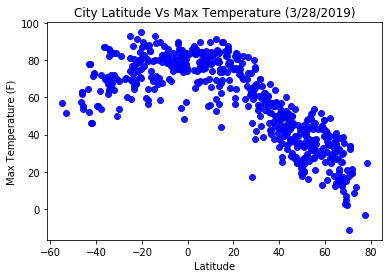

In [12]:
plt.scatter(latitudes, temperatures, marker="o", facecolors="blue", alpha=0.9)
plt.title("City Latitude Vs Max Temperature" + " " + today)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Temperature_Vs_Latitude.png")
plt.show()

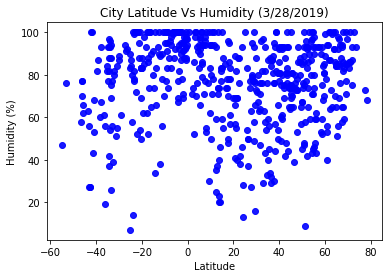

In [13]:
#scatter plot of Humidity vs latitude
plt.scatter(latitudes, humidities, marker="o", facecolors="blue", alpha=0.9)

plt.title("City Latitude Vs Humidity" + " " + today)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Humidity_Vs_Latitude.png")
plt.show()

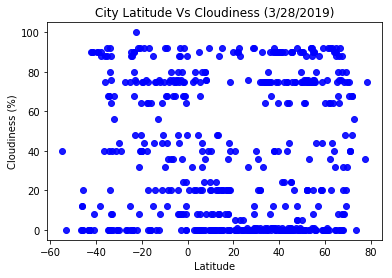

In [14]:
#scatter plot of Latitude Vs Cloudiness
plt.scatter(latitudes, cloudiness, marker="o", facecolors="blue", alpha=0.9)

plt.title("City Latitude Vs Cloudiness" + " " + today)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Cloudiness_Vs_Latitude.png")
plt.show()

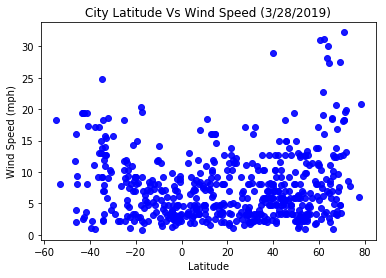

In [15]:
plt.scatter(latitudes, windSpeed, marker="o", facecolors="blue", alpha=0.9)

plt.title("City Latitude Vs Wind Speed" + " " + today)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Wind_speed_Vs_Latitude.png")
plt.show()